<a href="https://colab.research.google.com/github/ty1en01s/SangOck_ToyProjects/blob/main/Econometrics_Practice/LESE207_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Codes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import scipy as sp

data = pd.read_csv("NERLOV.CSV")
data.head()

,ORDER,COSTS,KWH,PL,PF,PK
0,101,0.082,2,2.09,17.9,183
1,102,0.661,3,2.05,35.1,174
2,103,0.990,4,2.05,35.1,171
3,104,0.315,4,1.83,32.2,166
4,105,0.197,5,2.12,28.6,233


In [2]:
data.describe()

,ORDER,COSTS,KWH,PL,PF,PK
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,315.000000,12.976097,2133.082759,1.972069,26.176552,174.496552
std,142.159681,19.794577,2931.942131,0.236807,7.876071,18.209477
min,101.000000,0.082000,2.000000,1.450000,10.300000,138.000000
25%,208.000000,2.382000,279.000000,1.760000,21.300000,162.000000
50%,315.000000,6.754000,1109.000000,2.040000,26.900000,170.000000
75%,422.000000,14.132000,2507.000000,2.190000,32.200000,183.000000
max,529.000000,139.422000,16719.000000,2.320000,42.800000,233.000000


In [3]:
Baseline_data = np.log(data[['COSTS','KWH','PL','PF','PK']])
Baseline_data.columns = ['Log(Cost)','Log(Y(kWh))','Log(Pl)','Log(Pf)','Log(Pk)']
Baseline_data.head()

,Log(Cost),Log(Y(kWh)),Log(Pl),Log(Pf),Log(Pk)
0,-2.501036,0.693147,0.737164,2.884801,5.209486
1,-0.414001,1.098612,0.717840,3.558201,5.159055
2,-0.010050,1.386294,0.717840,3.558201,5.141664
3,-1.155183,1.386294,0.604316,3.471966,5.111988
4,-1.624552,1.609438,0.751416,3.353407,5.451038


In [4]:
Baseline = sm.OLS(Baseline_data['Log(Cost)'], sm.add_constant(Baseline_data[['Log(Y(kWh))','Log(Pl)','Log(Pf)','Log(Pk)']])).fit()
print(Baseline.summary())

                            OLS Regression Results                            
Dep. Variable:              Log(Cost)   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     437.7
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           4.82e-78
Time:                        03:14:25   Log-Likelihood:                -67.542
No. Observations:                 145   AIC:                             145.1
Df Residuals:                     140   BIC:                             160.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.5265      1.774     -1.987      

In [5]:
A_data = Baseline_data[['Log(Cost)']].copy()
A_data['Log(Cost)-Log(Pk)'] = A_data['Log(Cost)'] - Baseline_data['Log(Pk)']
A_data['Log(Y(kWh))'] = Baseline_data['Log(Y(kWh))']
A_data['Log(Pl)-Log(Pk)'] = Baseline_data['Log(Pl)'] - Baseline_data['Log(Pk)']
A_data['Log(Pf)-Log(Pk)'] = Baseline_data['Log(Pf)'] - Baseline_data['Log(Pk)']

A_data = A_data.iloc[0:,1:]
A_data.head()

,Log(Cost)-Log(Pk),Log(Y(kWh)),Log(Pl)-Log(Pk),Log(Pf)-Log(Pk)
0,-7.710522,0.693147,-4.472322,-2.324685
1,-5.573057,1.098612,-4.441216,-1.600854
2,-5.151714,1.386294,-4.423824,-1.583462
3,-6.267170,1.386294,-4.507672,-1.640021
4,-7.075590,1.609438,-4.699622,-2.097632


In [6]:
Model_A = sm.OLS(A_data['Log(Cost)-Log(Pk)'], sm.add_constant(A_data[['Log(Y(kWh))','Log(Pl)-Log(Pk)','Log(Pf)-Log(Pk)']])).fit()
print(Model_A.summary())

                            OLS Regression Results                            
Dep. Variable:      Log(Cost)-Log(Pk)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     597.6
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           6.16e-80
Time:                        03:14:29   Log-Likelihood:                -67.838
No. Observations:                 145   AIC:                             143.7
Df Residuals:                     141   BIC:                             155.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -4.6908      0.885     

In [7]:
RSSu = Baseline.ssr
RSSr = Model_A.ssr
q = 1
n = len(Baseline_data)
r = len(Baseline.params)
F_stat = ((RSSr-RSSu)/(q))/(RSSu/(n-r))
Pval = 1-sp.stats.f(q,n-r).cdf(F_stat)

print(f"RSSu: {RSSu}\nRSSr: {RSSr}]\nq: {q}\nn: {n}\nr: {r}")
print(f"\nTest Result: \nF-stat: {F_stat}\nP-value:{Pval}")

RSSu: 21.552008164185782
RSSr: 21.64031911672138]
q: 1
n: 145
r: 5

Test Result: 
F-stat: 0.5736603875052707
P-value:0.45008093212710076


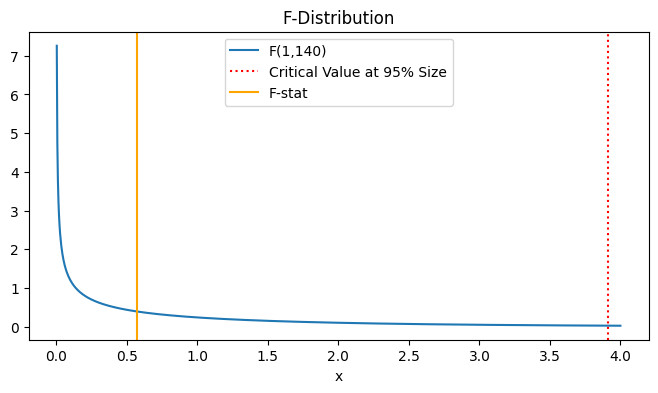

In [8]:
xx = np.linspace(0.003, 4, 1000)
plt.figure(figsize=(8,4))
plt.plot(xx, sp.stats.f(q, n-r).pdf(xx), ls="-", label=f"F({q},{n-r})")
plt.axvline(sp.stats.f.isf(0.05, q, n-r), ls=":", label="Critical Value at 95% Size",color='red')
plt.axvline(F_stat, ls="-",color='orange', label="F-stat")
plt.xlabel("x")
plt.title("F-Distribution")
plt.legend()
plt.show()

In [9]:
C_data = A_data.copy()
C_data['Log(Y(kWh))^2'] = pow(A_data['Log(Y(kWh))'],2)
Model_C = sm.OLS(C_data['Log(Cost)-Log(Pk)'], sm.add_constant(C_data[['Log(Y(kWh))','Log(Y(kWh))^2','Log(Pl)-Log(Pk)','Log(Pf)-Log(Pk)']])).fit()
print(Model_C.summary())

                            OLS Regression Results                            
Dep. Variable:      Log(Cost)-Log(Pk)   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     749.2
Date:                Thu, 14 Aug 2025   Prob (F-statistic):           2.03e-93
Time:                        03:14:43   Log-Likelihood:                -32.259
No. Observations:                 145   AIC:                             74.52
Df Residuals:                     140   BIC:                             89.40
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.7646      0.702     

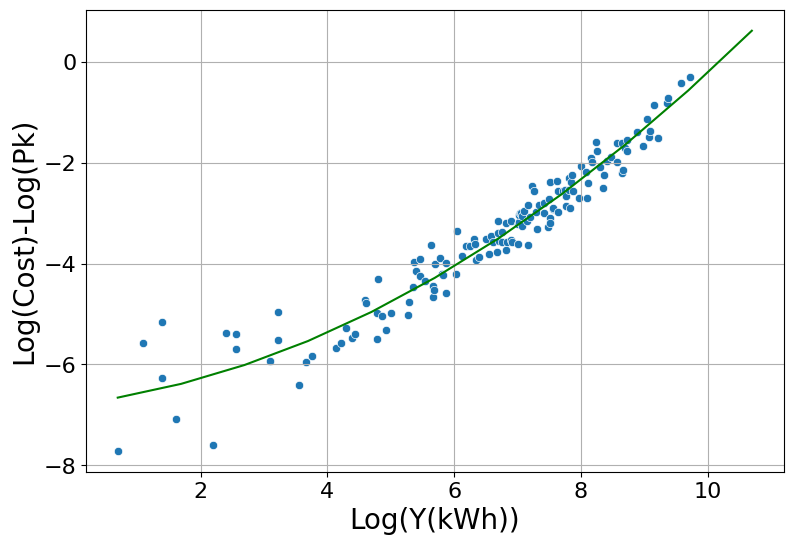

In [11]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
fig, ax = plt.subplots(figsize=(9,6))

linex = np.arange(C_data['Log(Y(kWh))'].min(),C_data['Log(Y(kWh))'].max()+1)
coefs = Model_C.params

const = coefs['const']
for i in list(coefs.drop(['Log(Y(kWh))','Log(Y(kWh))^2','const']).index):
  const = const + coefs[i] * C_data[i].mean()

liney = const + coefs['Log(Y(kWh))']*linex + coefs['Log(Y(kWh))^2']*linex**2
ax.plot(linex, liney, 'g')

sns.scatterplot(ax=ax,y=C_data['Log(Cost)-Log(Pk)'], x=C_data['Log(Y(kWh))'])
ax.grid(True)

<Axes: >

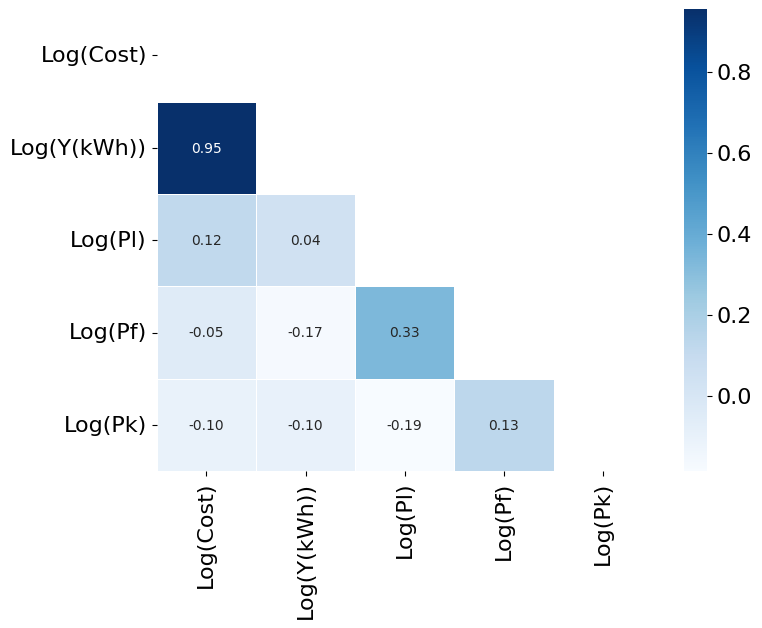

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
mask = np.zeros_like(Baseline_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data = Baseline_data.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=.5, cmap="Blues")

(np.float64(-0.5), np.float64(3122.5), np.float64(635.5), np.float64(-0.5))

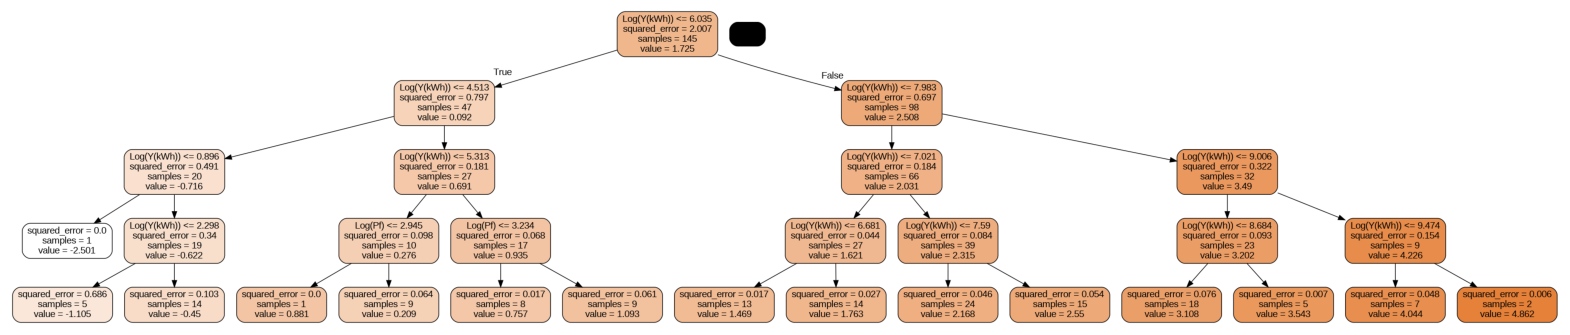

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
import pydotplus

dt = DecisionTreeRegressor(criterion='squared_error', max_depth=4, random_state=1111)
dt.fit(Baseline_data[['Log(Y(kWh))','Log(Pl)','Log(Pf)','Log(Pk)']], Baseline_data['Log(Cost)'])

tree = export_graphviz(dt, out_file=None, feature_names = ['Log(Y(kWh))','Log(Pl)','Log(Pf)','Log(Pk)'], rounded=True, filled=True)
pydot_graph = pydotplus.graph_from_dot_data(tree)
pydot_graph.write_png('tree.png')
reduced = mpimg.imread('tree.png')
plt.figure(figsize=(20, 15))
plt.imshow(reduced)
plt.axis('off')

##APPENDIX: Prototyping

In [14]:
!pip install gradio

In [15]:
import gradio as gr
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = pd.read_csv("NERLOV.CSV")
Baseline_data = np.log(data[['COSTS','KWH','PL','PF','PK']])
Baseline_data.columns = ['Log(Cost)','Log(Y(kWh))','Log(Pl)','Log(Pf)','Log(Pk)']
Baseline_data.head()

C_data = Baseline_data.copy()
C_data['Log(Cost)-Log(Pk)'] = Baseline_data['Log(Cost)'] - Baseline_data['Log(Pk)']
C_data['Log(Y(kWh))'] = Baseline_data['Log(Y(kWh))']
C_data['Log(Y(kWh))^2'] = pow(C_data['Log(Y(kWh))'],2)
C_data['Log(Pl)-Log(Pk)'] = Baseline_data['Log(Pl)'] - Baseline_data['Log(Pk)']
C_data['Log(Pf)-Log(Pk)'] = Baseline_data['Log(Pf)'] - Baseline_data['Log(Pk)']

Model_C = sm.OLS(C_data['Log(Cost)-Log(Pk)'], sm.add_constant(C_data[['Log(Y(kWh))','Log(Y(kWh))^2','Log(Pl)-Log(Pk)','Log(Pf)-Log(Pk)']])).fit()

def greet(y,pl,pf,pk):

    Input_data = C_data[['Log(Y(kWh))','Log(Y(kWh))^2','Log(Pl)-Log(Pk)','Log(Pf)-Log(Pk)']].loc[0:1].copy()
    Input_data['Log(Y(kWh))'] = [np.log(y),0]
    Input_data['Log(Y(kWh))^2'] = [pow(np.log(y),2),0]
    Input_data['Log(Pl)-Log(Pk)'] = [np.log(pl)-np.log(pk),0]
    Input_data['Log(Pf)-Log(Pk)'] = [np.log(pl)-np.log(pk),0]

    Result = Model_C.get_prediction(sm.add_constant(Input_data))
    Prediction = "Predicted Log(Cost)-Log(Pk) = " + str(round(Result.predicted_mean[0],5))
    Predict_cost = "Predicted Cost = "+  str(round(np.exp(Result.predicted_mean[0]+np.log(pk)),5))
    CI = "95% Confidence Interval = [" + str(round(Result.conf_int(0.05)[0][0],5)) + ", " + str(round(Result.conf_int(0.05)[0][1],5)) + "]"
    return Predict_cost, Prediction, CI,Model_C.summary()

demo = gr.Interface(
    fn=greet,
    inputs=[gr.Slider(min(data['KWH']), max(data['KWH'])),gr.Slider(min(data['PL']), max(data['PL'])),gr.Slider(min(data['PF']), max(data['PF'])),gr.Slider(min(data['PK']), max(data['PK']))],
    outputs=["text","text","text","text"],
)
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3b7ec4048b2ee16b21.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
